In [1]:
# Librerías básicas
import pandas as pd
import numpy as np

import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Carga de datos
df = pd.read_csv("solicitud_creditos_info.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251617 entries, 0 to 251616
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     251617 non-null  int64  
 1   default                   251617 non-null  int64  
 2   contract_type             251617 non-null  object 
 3   gender                    251617 non-null  object 
 4   flag_vehicle              251617 non-null  object 
 5   flag_properties           251617 non-null  object 
 6   num_children              251617 non-null  int64  
 7   total_income              251617 non-null  float64
 8   loan_amount               251617 non-null  float64
 9   income_type               251617 non-null  object 
 10  marital_status            251617 non-null  object 
 11  age                       251617 non-null  float64
 12  work_age                  251617 non-null  float64
 13  flag_cellphone            251617 non-null  i

,index,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,income_type,...,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year,block_month,year,month,Office,Employee
0,0,1,personal loan,M,N,Y,0,394338.0,1207961.0,shareholder,...,0.0,0.0,2.0,0.0,4.0,10,2017,10,110143,38
1,1,1,personal loan,F,N,Y,0,322796.0,409690.0,salary,...,0.0,0.0,0.0,0.0,1.0,4,2017,4,110143,38
2,2,1,personal loan,M,N,Y,1,241201.0,858450.0,salary,...,0.0,0.0,0.0,0.0,1.0,10,2017,10,110143,38
3,3,1,personal loan,M,N,N,1,264255.0,114679.0,salary,...,0.0,0.0,0.0,0.0,1.0,2,2017,2,110143,35
4,4,1,personal loan,F,N,Y,1,166682.0,402669.0,salary,...,0.0,0.0,0.0,0.0,1.0,12,2017,12,110143,38


In [3]:
# Libreria para machine learning https://scikit-learn.org/stable/
import sklearn

## Dividir los datos entre los datos de entrenamiento y los datos de validación

Se observa que la variable edad y la tenencia de la línea de teléfono móvil toman valores negativos y se encuentra en días y no en años. Por esto se convertíra a años

In [4]:
df['age'] = (df['age'] / 365.25) * -1
df['age'].describe()

count    251617.000000
mean         44.097712
std          12.207968
min          17.040383
25%          34.151951
50%          43.192334
75%          53.664613
max          83.704312
Name: age, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split # Importar la función para dividir los datos

# Defino las variables de interés tanto el objetivo como las variables independientes
objetivo = 'default'
caracteristicas = ['contract_type', 'total_income', 'loan_amount', 'marital_status', 'external_score_1', 'age']

X = df[caracteristicas]
y = df[objetivo]

# Dumies
X = pd.get_dummies(X)

# División de los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1345)

# Filas y columnas de cada tabla creada
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(201293, 12) (50324, 12) (201293,) (50324,)


## Estandarización de los datos
 
La estandarización hace que todas las columnas se encuentren en la misma escala, esto es conveniente para diferentes modelos como los lineales y los basados en distancias (KNN)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)

## Entrenamiento y ajuste


### Regresión logística


In [7]:
from sklearn.linear_model import LogisticRegression # Importar la función

lr = LogisticRegression() # Asignar la función
lr.fit(X_train_s, y_train) # Entrenar los datos

LogisticRegression()

In [8]:
# Predicciones en los datos de entrenamiento y validación
y_train_pred = lr.predict(X_train_s) # Predicciones en datos de entrenamiento
y_val_pred = lr.predict(X_val_s) # Predicciones en nuevos datos

F1 Score: 0.21832245186509755


<AxesSubplot:>

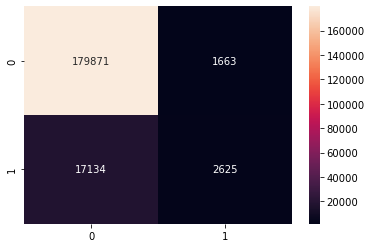

In [9]:
# Validación del modelo en datos de entrenamiento
from sklearn.metrics import confusion_matrix, f1_score
print('F1 Score:', f1_score(y_train, y_train_pred))
sns.heatmap(confusion_matrix(y_train, y_train_pred, labels=[0, 1]), annot=True, fmt='g')

F1 Score: 0.22158322056833563


<AxesSubplot:>

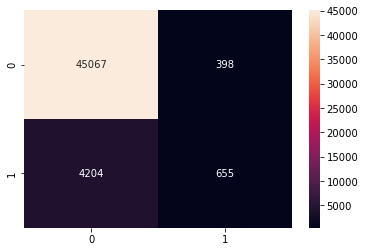

In [10]:
# Validación del modelo en datos de validación
print('F1 Score:', f1_score(y_val, y_val_pred))
sns.heatmap(confusion_matrix(y_val, y_val_pred, labels=[0, 1]), annot=True, fmt='g')

### Arbol de decisión (Decision Tree)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_s, y_train) # Entrenar los datos

DecisionTreeClassifier()

In [12]:
# Predicciones en los datos de entrenamiento y validación 
# El método de KNN toma mucho más tiempo en realizar las predicciones
y_train_pred_dt = dt.predict(X_train_s) # Predicciones en datos de entrenamiento
y_val_pred_dt = dt.predict(X_val_s) # Predicciones en nuevos datos

F1 Score: 1.0


<AxesSubplot:>

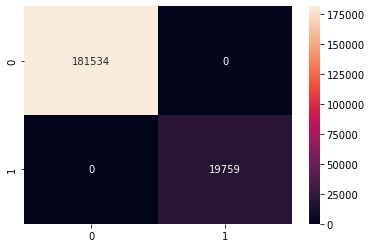

In [13]:
# Validación del modelo en datos de entrenamiento
print('F1 Score:', f1_score(y_train, y_train_pred_dt))
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt, labels=[0, 1]), annot=True, fmt='g')

F1 Score: 0.31407232704402516


<AxesSubplot:>

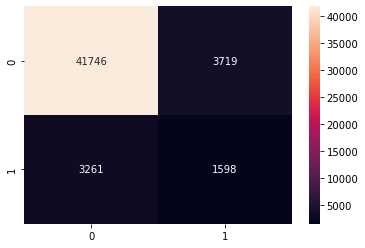

In [14]:
# Validación del modelo en datos de validación
print('F1 Score:', f1_score(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt, labels=[0, 1]), annot=True, fmt='g')

El árbol de decisión realiza predicciones perfectas en los datos de entrenamiento, es decir, en aquellos previamente observados. Sin embargo, aun cuando es mejor que la regresión logística, en los datos de validación es resultado no es muy bueno. Esto se denomina sobre ajuste del modelo: buenos resultados en datos de entrenamiento, pero resultados muy inferiores en los datos de validación o prueba.

### Bosque aleatorio (Radom Forest)


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_s, y_train) # Entrenar los datos

RandomForestClassifier()

In [16]:
# Predicciones en los datos de entrenamiento y validación 
# El método de KNN toma mucho más tiempo en realizar las predicciones
y_train_pred_rf = rf.predict(X_train_s) # Predicciones en datos de entrenamiento
y_val_pred_rf = rf.predict(X_val_s) # Predicciones en nuevos datos

F1 Score: 0.9997975196152873


<AxesSubplot:>

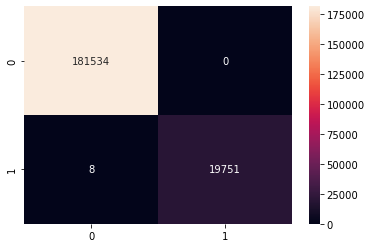

In [17]:
# Validación del modelo en datos de entrenamiento
print('F1 Score:', f1_score(y_train, y_train_pred_rf))
sns.heatmap(confusion_matrix(y_train, y_train_pred_rf, labels=[0, 1]), annot=True, fmt='g')

F1 Score: 0.3397532350285886


<AxesSubplot:>

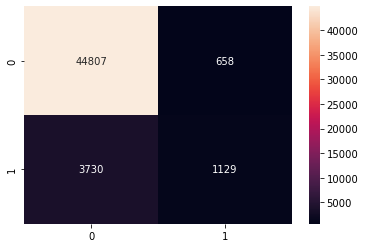

In [18]:
# Validación del modelo en datos de validación
print('F1 Score:', f1_score(y_val, y_val_pred_rf))
sns.heatmap(confusion_matrix(y_val, y_val_pred_rf, labels=[0, 1]), annot=True, fmt='g')

Random forest en los datos de validación (los no observados previamente) es mejor que los algortimos de ML probados anteriormente.

## Búsqueda de hiperparámetros del Random Forest

El ajuste a los hiperparámetros de los modelos de machine learning permite hacer mejores predicciones en datos no observados. Usualmente, la forma de determinar los mejores parámetros es a través del entrenamiento y evaluación con cada uno de los posibles parámetros. Esto se hace mediante una búsqueda de grilla (grid search) en donde el científico de datos indica los parámetros y los valores sobre los cuales buscar para que de todos los modelos ejecutados se indique cuáles son los parámetros que realizan las mejores predicciones en datos no observados.

En este caso se realizará una pequeña búsqueda de hiperparámetros en un modelo de Random Forest.

In [19]:
from sklearn.model_selection import GridSearchCV

grid_values = {'max_depth':[5,7,9], # Profundidad de los árboles que componen el bosque
               'class_weight':['balanced', None]} # Rebalancea los datos entrenando el modelo el datos con 50% inpago y 50% pago

algoritmo = RandomForestClassifier()

busqueda_de_grilla = GridSearchCV(estimator=algoritmo, # Algoritmo de búsqueda
                                  param_grid=grid_values, # El elemento que contiene los parámetros sobre los cuales buscar
                                  scoring='f1', # La métrica de ajuste de las predicciones
                                  verbose=3) # Si debe mostrar en pantalla el resumen

In [20]:
# Busqeuda de mejores hipeparámetros realizando validación cruzada
busqueda_de_grilla.fit(X_train_s,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END class_weight=balanced, max_depth=5;, score=0.382 total time=  13.6s
[CV 2/5] END class_weight=balanced, max_depth=5;, score=0.387 total time=  13.4s
[CV 3/5] END class_weight=balanced, max_depth=5;, score=0.373 total time=  13.3s
[CV 4/5] END class_weight=balanced, max_depth=5;, score=0.376 total time=  14.0s
[CV 5/5] END class_weight=balanced, max_depth=5;, score=0.366 total time=  13.7s
[CV 1/5] END class_weight=balanced, max_depth=7;, score=0.387 total time=  17.5s
[CV 2/5] END class_weight=balanced, max_depth=7;, score=0.391 total time=  17.2s
[CV 3/5] END class_weight=balanced, max_depth=7;, score=0.387 total time=  16.9s
[CV 4/5] END class_weight=balanced, max_depth=7;, score=0.387 total time=  17.3s
[CV 5/5] END class_weight=balanced, max_depth=7;, score=0.381 total time=  17.1s
[CV 1/5] END class_weight=balanced, max_depth=9;, score=0.401 total time=  20.6s
[CV 2/5] END class_weight=balanced, max_depth=9;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [5, 7, 9]},
             scoring='f1', verbose=3)

In [21]:
busqueda_de_grilla.best_estimator_ # Imprime en pantalla los hiperparámetros

RandomForestClassifier(class_weight='balanced', max_depth=9)

Del ejercicio anterior podemos ver que entre la búsqueda realizada, el Bosque aleatorio que mejor predice los datos no observados es uno con datos balanceados y con árboles cuya profundidad máxima es de 9.

Supongamos ahora que llega un cliente con las siguientes características y veamos que predice el modelo sobre si pagará o no el prestamo solicitado.

In [22]:
# Revisión de resultados en datos de validación
y_val_pred_rfgs = busqueda_de_grilla.predict(X_val_s)
print('F1:', f1_score(y_val, y_val_pred_rfgs))

F1: 0.3927032622684796


In [23]:
clienteX = pd.DataFrame(columns = X_train.columns) # Crear un data frame vacio con las columnas de los datos de entramiento
clienteX.loc[0] = [100000,1000,0.92,40, 1,0, 0,0,1,0,0,0] # Poblar el data frame
clienteX # Ver en pantalla

,total_income,loan_amount,external_score_1,age,contract_type_credit card,contract_type_personal loan,marital_status_civil partnership,marital_status_divorced,marital_status_married,marital_status_single,marital_status_unspecified,marital_status_widowed
0,100000.0,1000.0,0.92,40.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
# Se estandarizan los datos de este cliente
clienteX_s = scaler.transform(clienteX) # Con base en el objeto de estandarización usado antes
print('Predicción', busqueda_de_grilla.predict(clienteX_s))

Predicción [0]


0 Indica que pagará (1 impago). De este resultado, la decisión de la organización sería el otorgar el préstamo al solicitante dado que se espera que realice su pago de forma correcta.

Como medida de validación del modelo se uso el F1. Sin embargo, debe analizarse cuál de las métricas disponibles para validar modelos de clasificación es la más adecuada para el caso de la institución financiera que quiere identificar y evitar los clientes que no pagan sus deudas.

***Los estudiantes en su proyectos de la actividad 4 pueden trabajar en desarrollar más este ejemplo o las otras ideas de problemas especificos que les surgan***.